# Import Main Libraries

In [1]:
##Major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os,missingno,joblib

## sklearn
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,RandomizedSearchCV,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

##Models
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from xgboost import XGBRegressor


##Metrics
from sklearn.metrics import mean_squared_error,r2_score

import mlflow

### Load The DataSet 

In [47]:
MLFLOW_TRACK_URI='https://dagshub.com/dark7ray/Machine-Learning-Projects.mlflow'
mlflow.set_tracking_uri(MLFLOW_TRACK_URI)
os.environ['MLFLOW_TRACKING_USERNAME']='dark7ray'
os.environ['MLFLOW_TRACKING_PASSWORD']='4ce29cbd7bc7679e3a4ffb12d6ff4ae2956ce47a'

In [3]:
df=pd.read_csv( os.path.join(os.getcwd(),'housing.csv'))

In [4]:
## Show The head of Df
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
## Check Some Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* > Shows that there is some nulls in total_bedrooms

In [6]:
## Shows some Statistics of DataSet
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
## Check Nulls
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

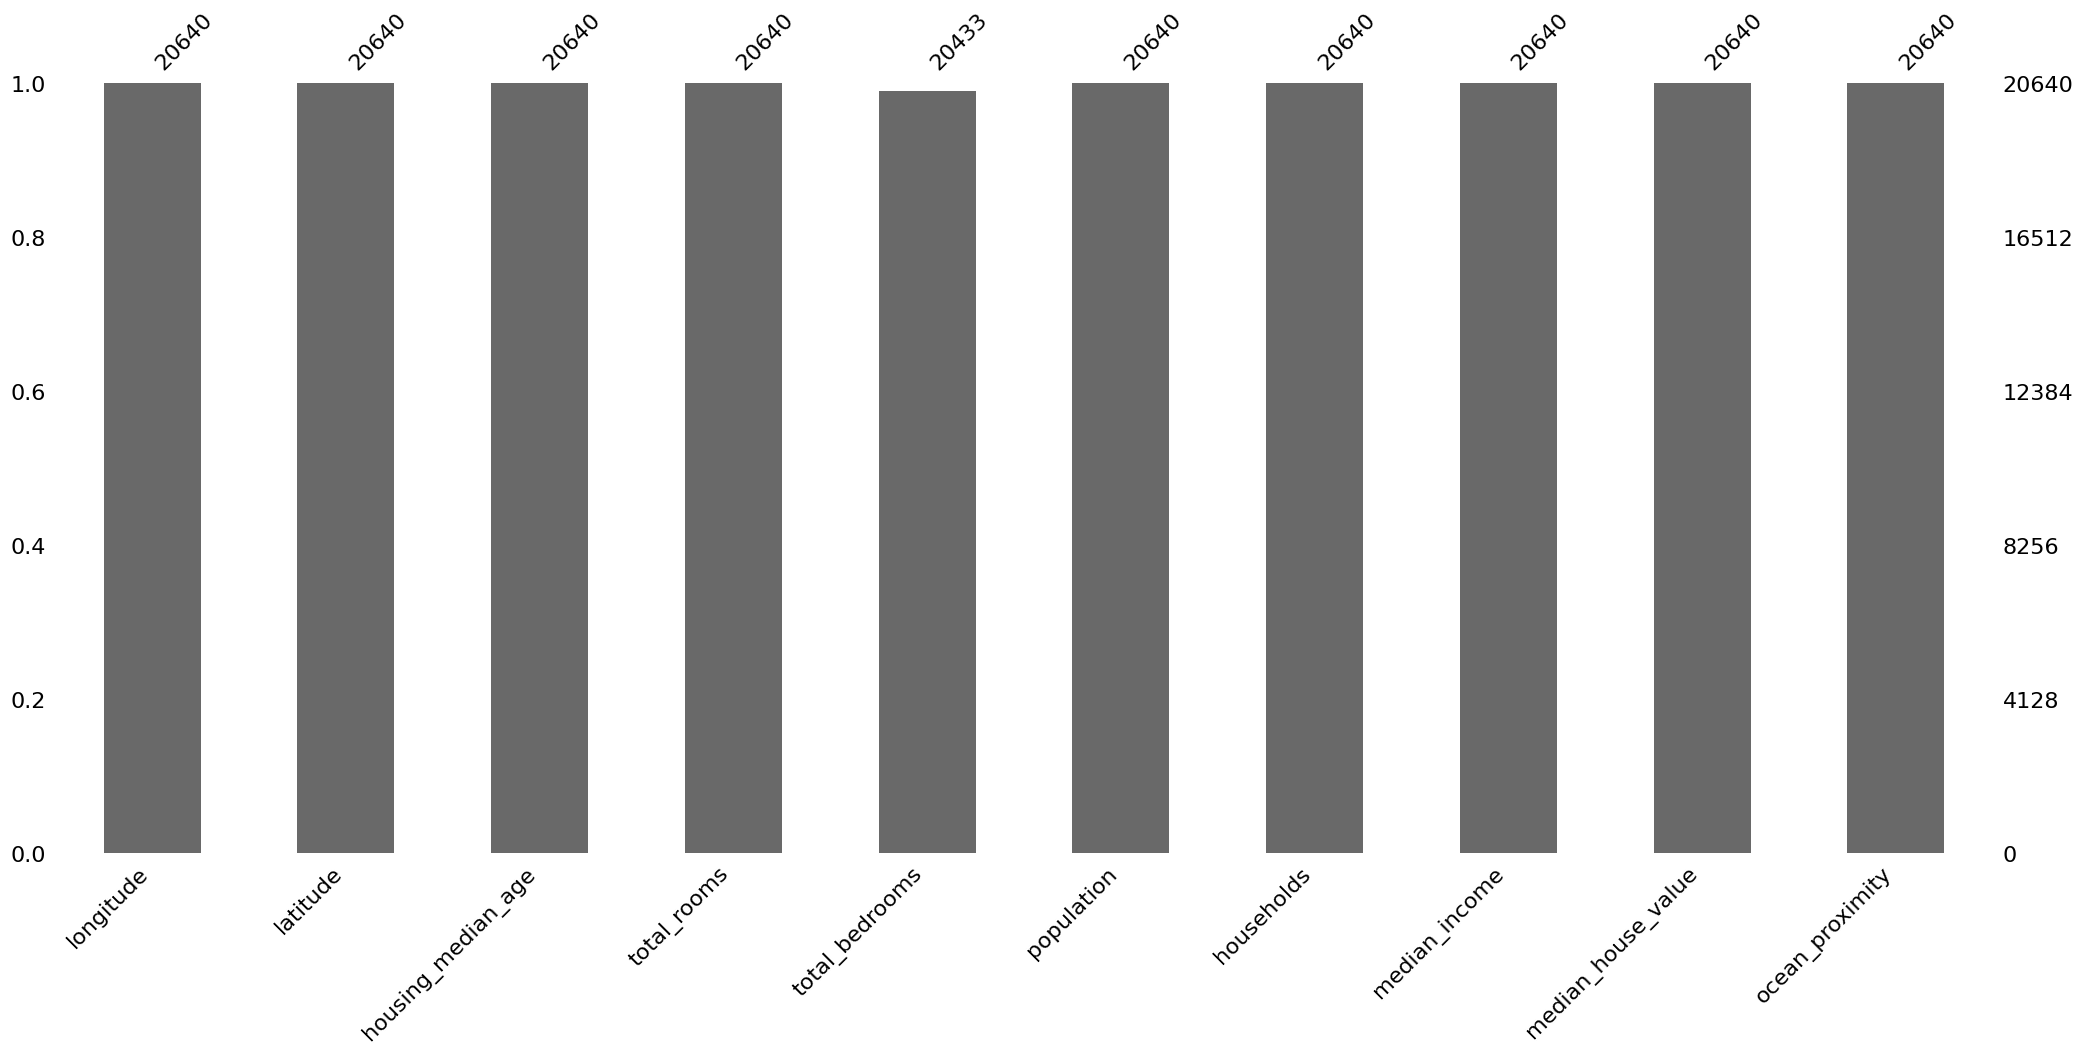

In [8]:
## Check nulls using Missingno
missingno.bar(df)

<Axes: >

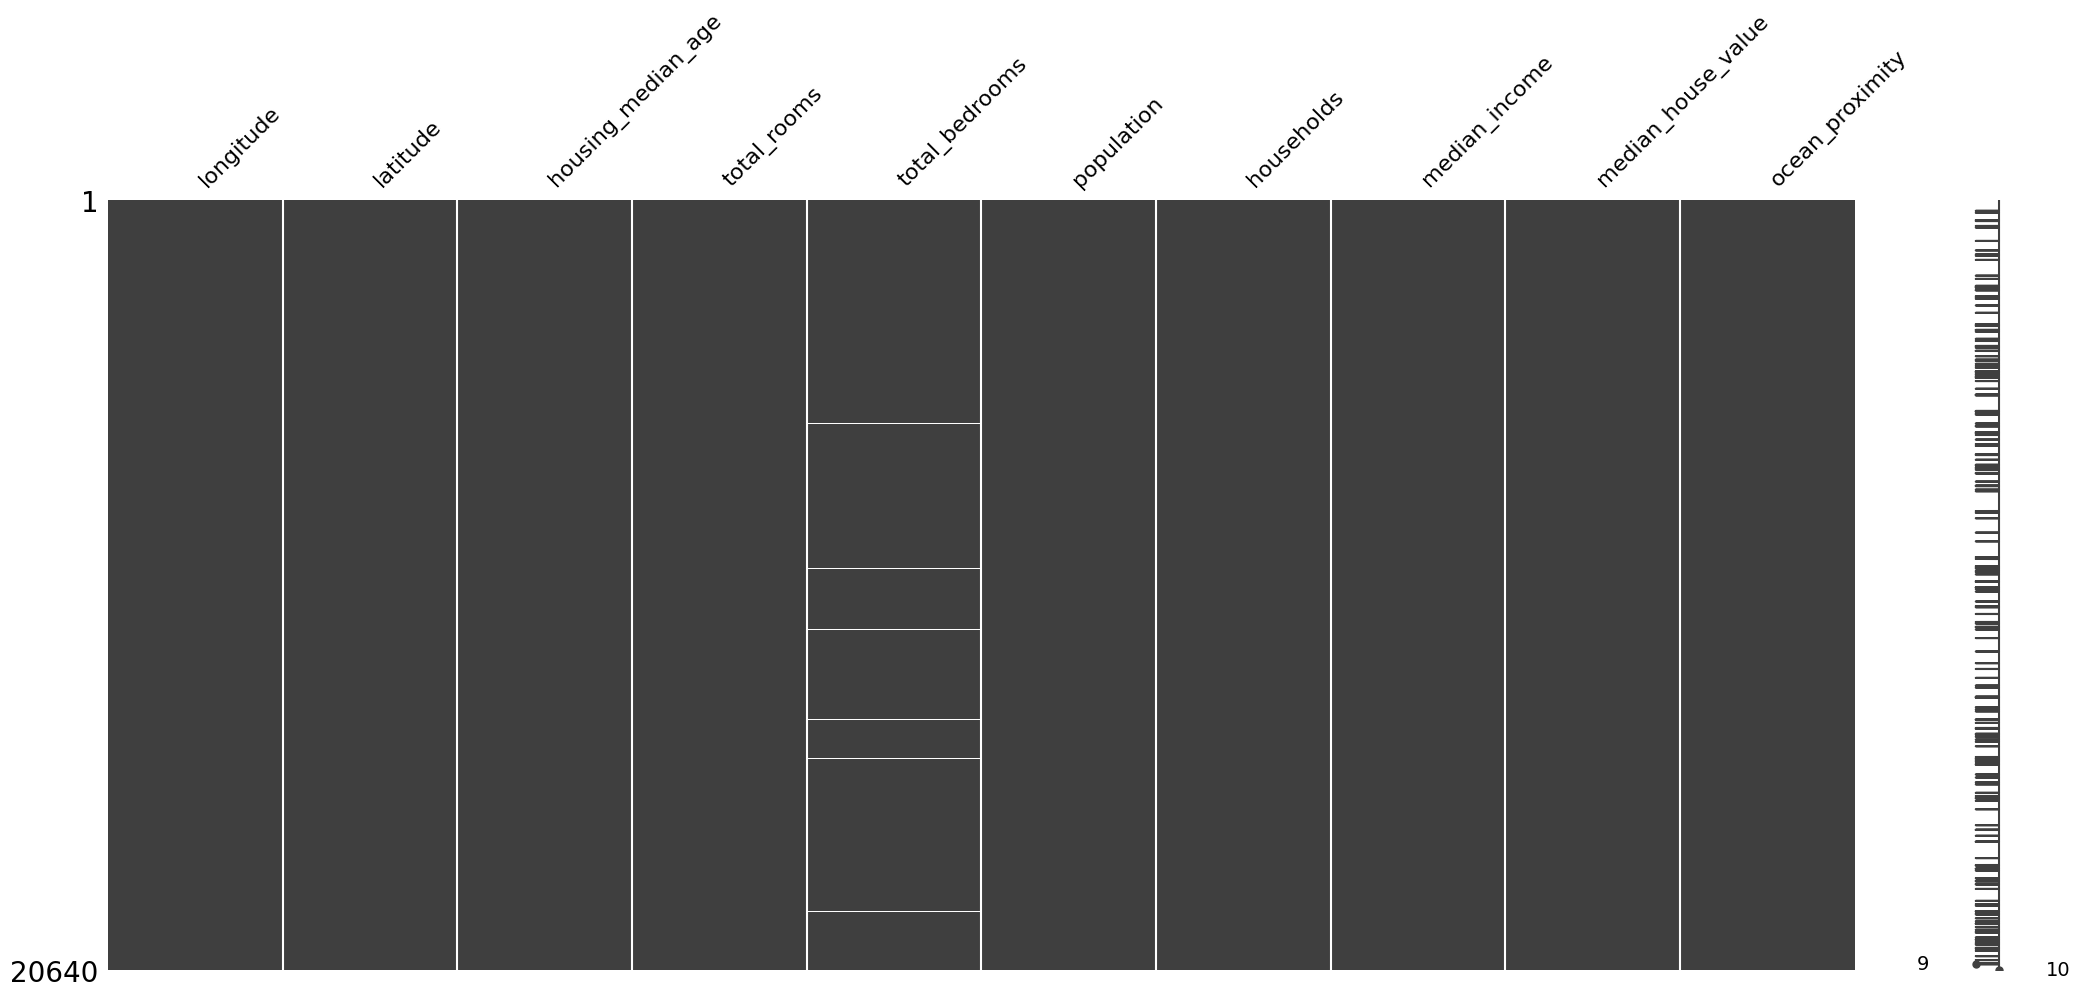

In [9]:
missingno.matrix(df)

* > The data frame Contains 20640 instances and 10 columns most of them are Float64 type except one are object 'ocean_proximity' , It seems that we discovered 207 null values in the "total_bedrooms" Feature

# Exploratory Data Analysis (EDA)

### Univariate Visualization

In [10]:
ocean_values=df['ocean_proximity'].unique()
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

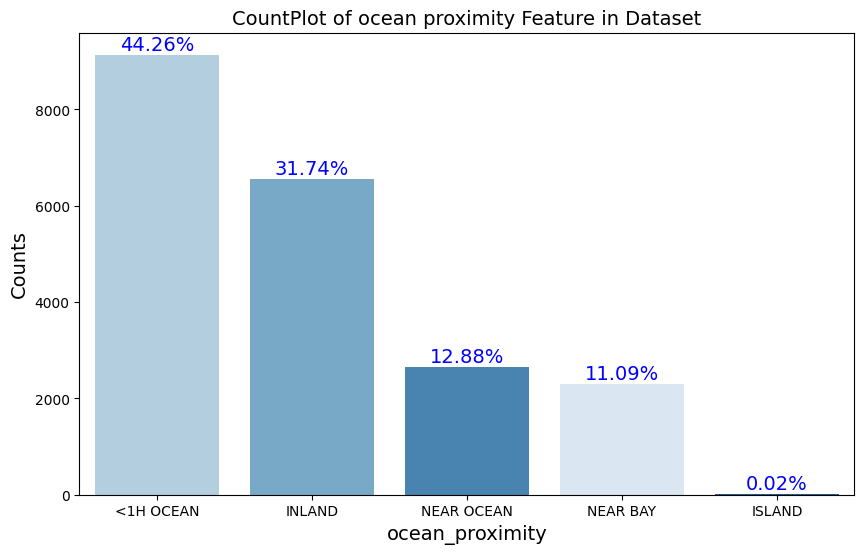

In [11]:
## Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df['ocean_proximity'].value_counts()

## plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df, order=ocean_values.index ,palette='Blues',hue='ocean_proximity')  ## ordered
plt.title('CountPlot of ocean proximity Feature in Dataset', fontsize=14, c='k')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values.iloc[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

In [12]:
## replace <1H OCEAN For Deployment 
df['ocean_proximity']=df['ocean_proximity'].replace("<1H OCEAN","1H OCEAN")
df['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

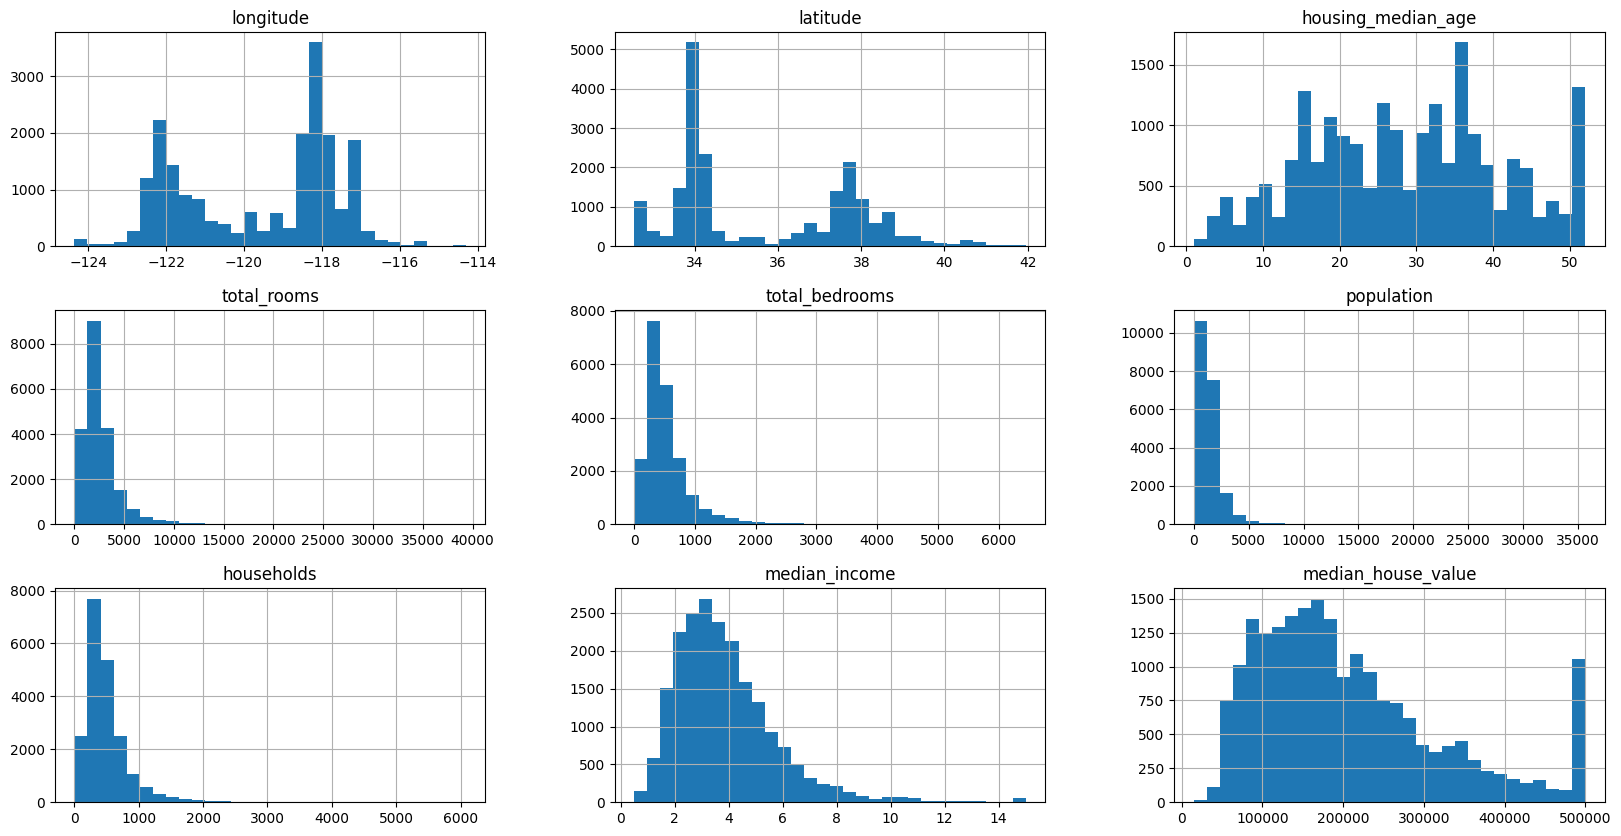

In [13]:
## Histogram Dist
df.hist(bins=30,figsize=(20,10))
plt.show()

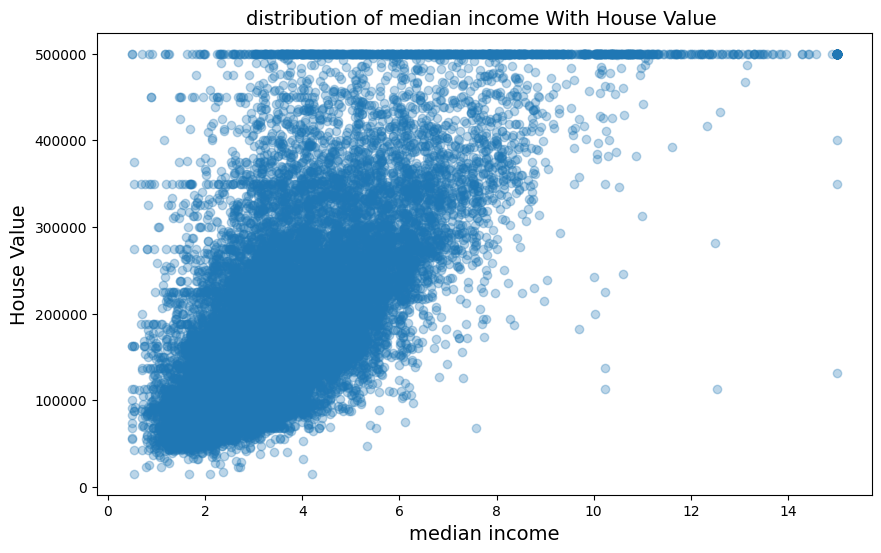

In [14]:
## Scaterplot Between [median_income] & [median_house_value]
plt.figure(figsize=(10,6))
plt.scatter(x=df['median_income'],y=df['median_house_value'],alpha=0.3)
plt.title("distribution of median income With House Value ",fontsize=14,c='k')
plt.xlabel('median income',fontsize=14,c='k')
plt.ylabel('House Value',fontsize=14,c='k')
plt.show()

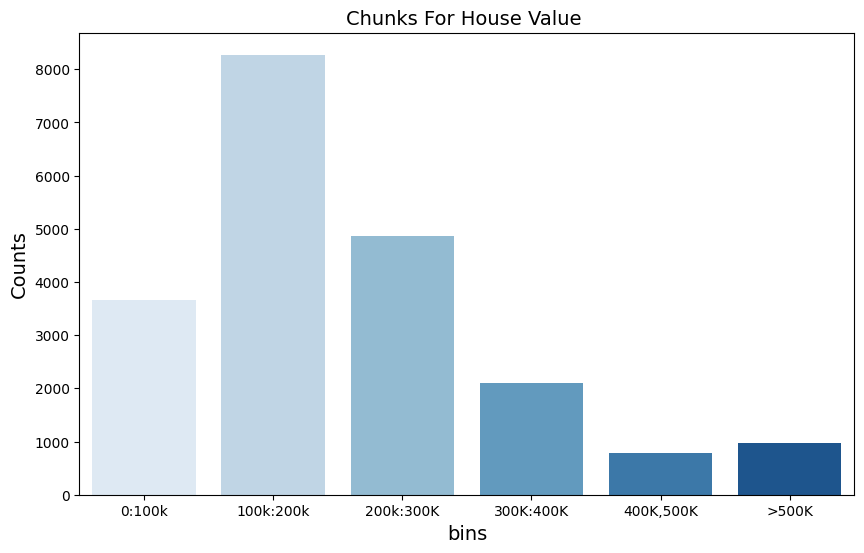

In [15]:
## converting [median_house_value] to chunks
House_Value_bins=pd.cut(x=df['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
       labels=['0:100k','100k:200k','200k:300K','300K:400K','400K,500K','>500K'])


plt.figure(figsize=(10,6))
sns.countplot(x=House_Value_bins,palette='Blues',hue=House_Value_bins)
plt.title("Chunks For House Value ",fontsize=14,c='k')
plt.xlabel('bins',fontsize=14,c='k')
plt.ylabel('Counts',fontsize=14,c='k')
plt.show()

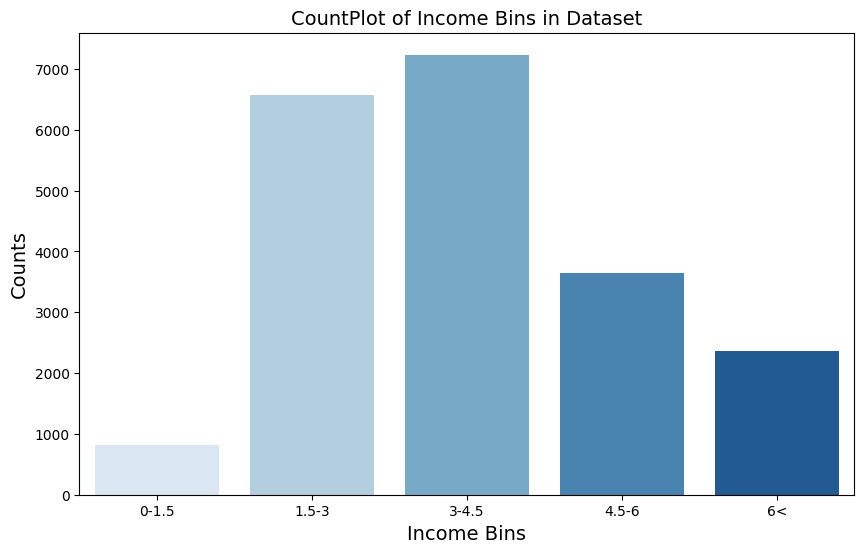

In [16]:
## converting [median_income] to chunks
income_bins = pd.cut(x=df['median_income'], 
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins,palette='Blues',hue=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

* > It Seems that near to the half of our data is <1H OCEAN and the most median house value are between 100K:200K and most median income between 3:4.5 k

### Bivariate Visualization

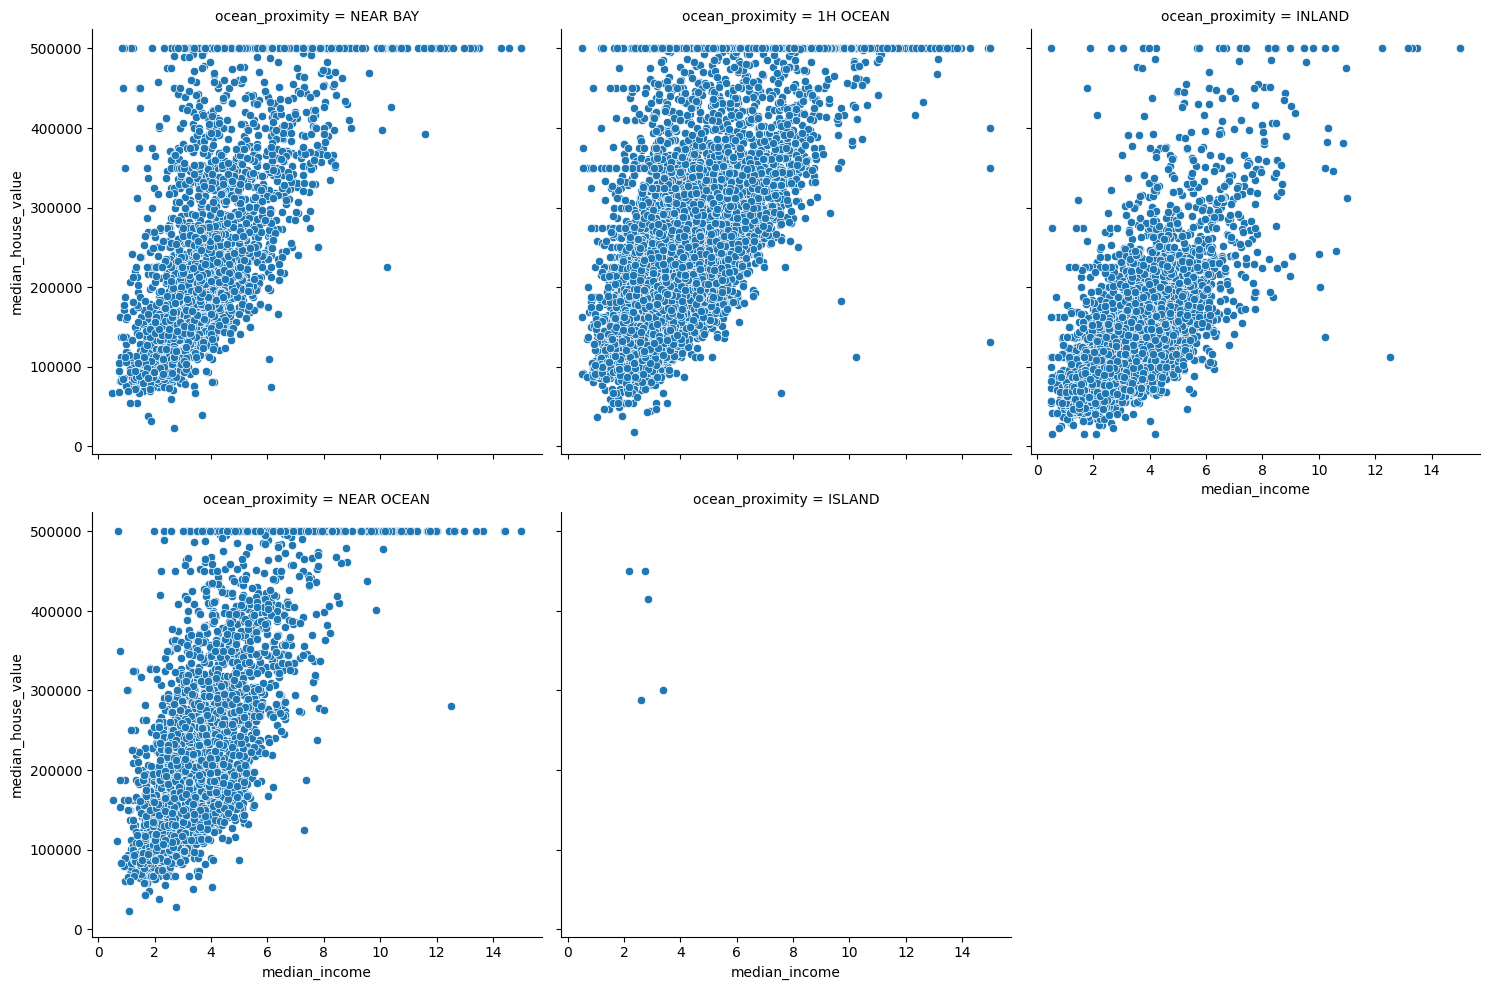

In [17]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity) 
sns.relplot(x='median_income',y='median_house_value',col='ocean_proximity',kind='scatter',data=df,col_wrap=3)
plt.show()

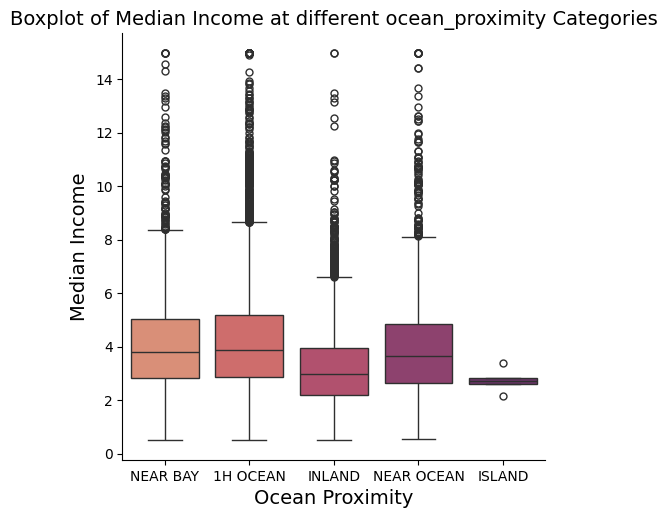

In [18]:
## Check the Boxplot of the (median_income) at different categories of (ocean_proximity)
sns.catplot(y='median_income',x='ocean_proximity',data=df,kind='box',palette='flare',hue='ocean_proximity')
plt.title('Boxplot of Median Income at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

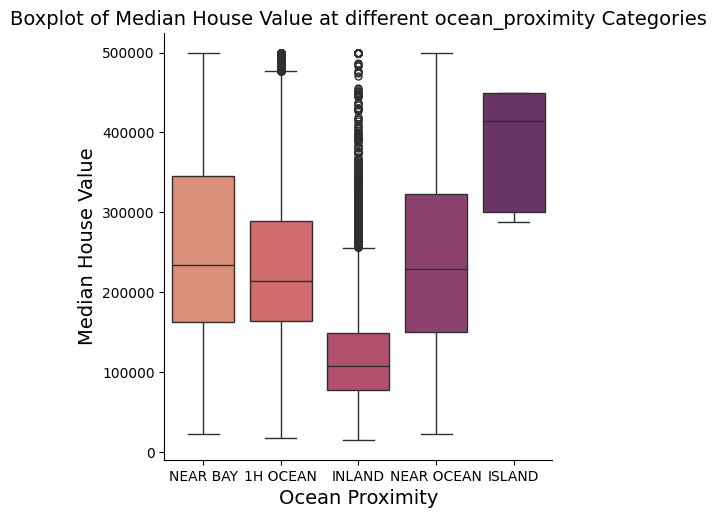

In [19]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(y='median_house_value',x='ocean_proximity',kind='box',hue='ocean_proximity',palette='flare',data=df)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* > Showing That the median income according to Ocean proximity Category is almost the same except for Inland Category
  > and also the same Thing for House median Value 

### Multivariate Visualization

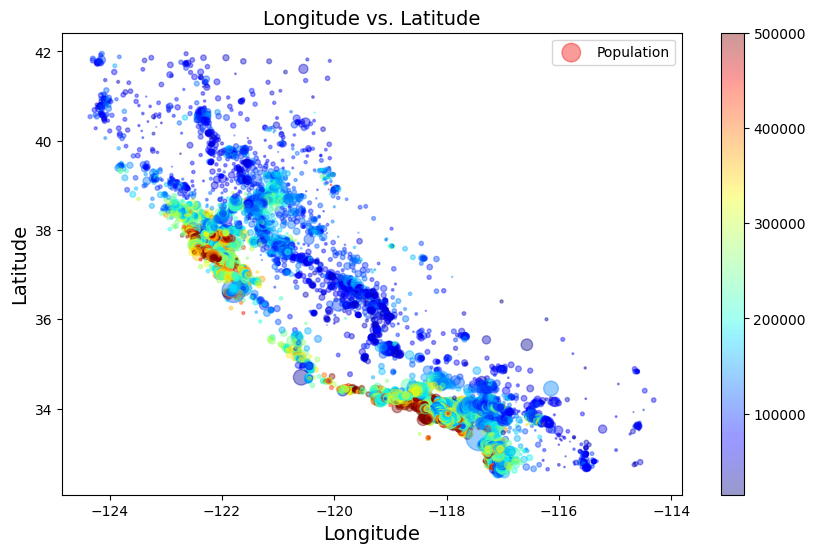

In [20]:
plt.figure(figsize=(10,6))
sc=plt.scatter(x=df['longitude'],y=df['latitude'],s=df['population']/100,c=df['median_house_value'],alpha=0.4,cmap=plt.get_cmap('jet'),label='Population')
plt.colorbar(sc)

plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

 * > `Comment: IIt seems that prices is higher near the ocean than other zones, and also these araes have higher population` 

## Checking The Correlation

In [21]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

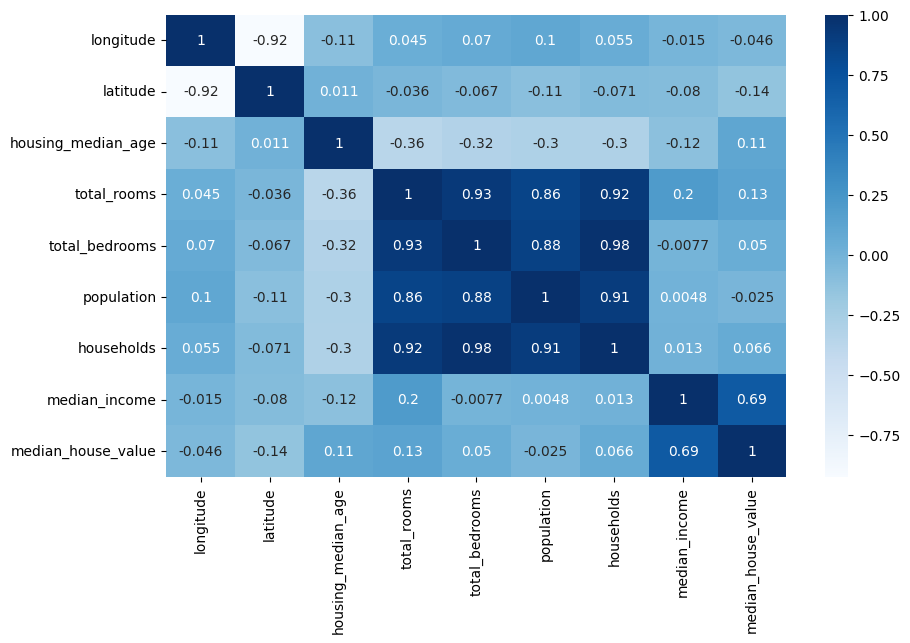

In [22]:
# using HeatMap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues")
plt.show()

* > Seems That The most Correlated Feature with Target is Median Income and  population,households  are less correlated

# Feature Engineering

In [23]:
## Try Feature Extraction
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [24]:
# Check The Correlation again
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

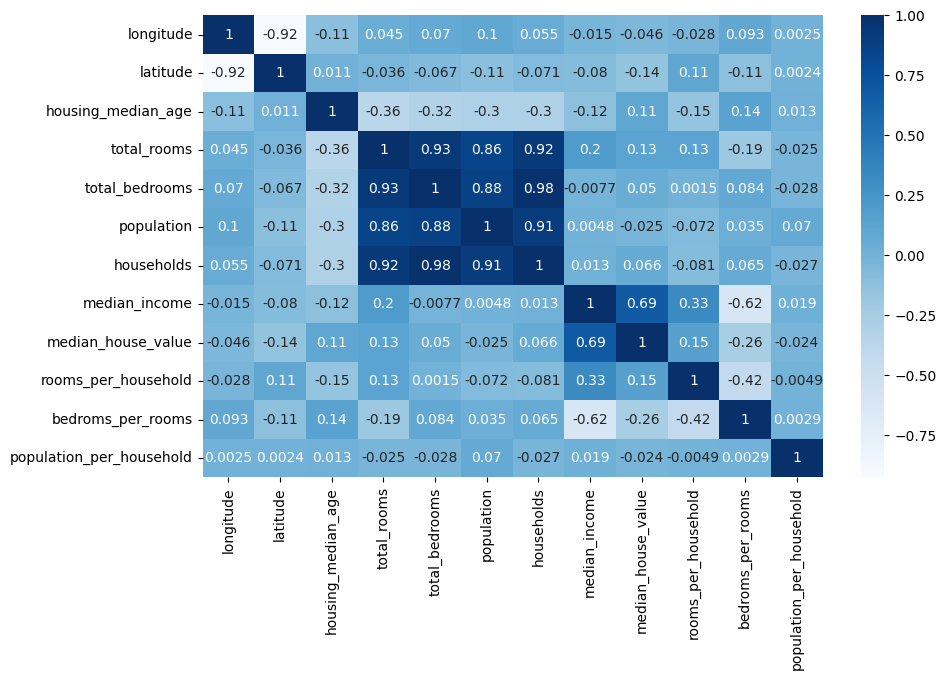

In [25]:
# using HeatMap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues")
plt.show()

# Split The DataSet

In [26]:
## Splitting To Feature & Target
X=df.drop(columns=['median_house_value'],axis=1)
y=df['median_house_value']

In [27]:
X.shape

(20640, 12)

In [28]:
y.shape

(20640,)

In [29]:
#split to Train & test 
X_train, X_test, y_train, y_test =train_test_split(X,y,shuffle=True,test_size=0.15,random_state=42)
#check The Shape
print('X Train  Shape is--> ',X_train.shape)
print('y Train  Shape is--> ',y_train.shape)
print('X Test  Shape is--> ',X_test.shape)
print('y Test  Shape is--> ',y_test.shape)

X Train  Shape is-->  (17544, 12)
y Train  Shape is-->  (17544,)
X Test  Shape is-->  (3096, 12)
y Test  Shape is-->  (3096,)


## Separating Categorical & Numerical Features


In [30]:
## Separating Categorical & Numerical Features
num_col=[col for col in X_train.columns if X_train[col].dtype in ['float32','float64','int32','int64'] ]
cat_col=[col for col in X_train.columns if X_train[col].dtype not in ['float32','float64','int32','int64'] ]

In [31]:
num_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedroms_per_rooms',
 'population_per_household']

In [32]:
cat_col

['ocean_proximity']

# Pipelining

In [33]:
## Pipilining Numerical Features
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_col)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(cat_col)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

##Concatenate Two Piplines
total_pip=FeatureUnion(transformer_list=[
                                   ('num_pip',num_pipeline),
                                    ('cat_pip',categ_pipeline)
])

X_train_final=total_pip.fit_transform(X_train)
X_test_final=total_pip.transform(X_test)

In [34]:
## DataFrame after Piplinning
pd.DataFrame(X_train_final)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.654023,-0.745627,-1.315284,-0.967228,-0.502063,-0.204726,-0.353984,-1.410413,-1.566214,6.904312,0.016294,1.0,0.0,0.0,0.0,0.0
1,0.773694,-0.783067,0.271015,-0.078305,0.033339,-0.208253,-0.054561,-0.024804,-0.111839,0.185826,-0.053750,1.0,0.0,0.0,0.0,0.0
2,-0.836879,1.046825,1.064165,-0.999418,-1.063758,-1.031624,-1.068395,-0.370692,-0.171961,-0.222417,-0.029863,0.0,1.0,0.0,0.0,0.0
3,-2.287891,2.408714,1.143480,-0.162461,-0.141145,-0.226765,-0.046682,-1.005435,-0.274269,-0.056310,-0.059004,0.0,0.0,0.0,0.0,1.0
4,0.878406,-0.867307,-0.204874,0.001252,0.226944,1.966540,0.307897,0.136849,-0.455846,0.462195,0.252697,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0.808598,-0.871987,0.508960,-0.601634,-0.805617,-0.677239,-0.742708,1.316592,0.273440,-1.065584,-0.004978,1.0,0.0,0.0,0.0,0.0
17540,1.072871,-0.759667,0.350330,0.204973,0.076362,0.288062,-0.133357,-0.435005,0.565197,-0.484226,0.072639,0.0,1.0,0.0,0.0,0.0
17541,0.599173,-0.754987,0.588275,-0.247076,0.073972,0.290707,0.071511,-0.495994,-0.571699,0.999463,0.021709,1.0,0.0,0.0,0.0,0.0
17542,-1.185920,0.906424,-1.077339,0.430767,0.140898,0.309219,0.155560,0.973237,0.378501,-0.791870,0.008074,1.0,0.0,0.0,0.0,0.0


# Building Models

## Linear Regression

In [35]:
## Building The Model
lin_reg=LinearRegression()
lin_reg.fit(X_train_final,y_train) ## Training

LinearRegression()

In [36]:
## checking Coeff & intercept
lin_reg.coef_ ,lin_reg.intercept_

(array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
          8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
          6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
        -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772]),
 np.float64(239967.5707416455))

In [37]:
# Cross Validation Scoring
mse_lin_score=cross_val_score(estimator=lin_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse_lin_score=-1*mse_lin_score
rmse_lin_score=np.sqrt(mse_lin_score)
rmse_lin_score.mean()

np.float64(67880.14257788868)

In [38]:
# Cross Validation Prediction
y_pred_lin=cross_val_predict(estimator=lin_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
mse_pred_lin=mean_squared_error(y_train,y_pred_lin)
rmse_pred_lin=np.sqrt(mse_pred_lin)
rmse_pred_lin

np.float64(67898.88872785706)

## SGDRegression

In [39]:
## Building The Model
sgd_reg=SGDRegressor(penalty='l2',alpha=0.0001,shuffle=True,max_iter=10000,eta0=0.001)
sgd_reg.fit(X_train_final,y_train) ## Training

SGDRegressor(eta0=0.001, max_iter=10000)

In [40]:
# Cross Validation Scoring
mse_sgd_score=cross_val_score(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
mse_sgd_score=-1*mse_sgd_score
rmse_sgd_score=np.sqrt(mse_sgd_score)
rmse_sgd_score.mean()

np.float64(67983.63754419218)

In [41]:
# Cross Validation Prediction
y_pred_sgd=cross_val_predict(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
mse_pred_sgd=mean_squared_error(y_train,y_pred_sgd)
rmse_pred_sgd=np.sqrt(mse_pred_sgd)
rmse_pred_sgd

np.float64(68002.94019497006)

In [49]:
mlflow.log_metric("RMSE SGD",rmse_pred_sgd)

## Random Forest

In [42]:
## Building The Model
rf_reg=RandomForestRegressor(n_estimators=150,max_depth=6,n_jobs=-1,random_state=42,max_samples=0.8)
rf_reg.fit(X_train_final,y_train) ## Training

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [43]:
# Cross Validation Scoring
rf_reg_score=cross_val_score(estimator=rf_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
rmse_rf_score=np.sqrt(-1*rf_reg_score)
rmse_rf_score.mean()

np.float64(59969.67796450624)

In [44]:
# Cross Validation Prediction
y_pred_rf=cross_val_predict(estimator=rf_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
mse_pred_rf=mean_squared_error(y_train,y_pred_rf)
rmse_pred_rf=np.sqrt(mse_pred_rf)
rmse_pred_rf

np.float64(59980.31941432441)

In [48]:
mlflow.log_metric("RMSE Random Forest",rmse_pred_rf)

# RF Tunning

In [ ]:
## Setting The Desired Hyperparams
# param_best_forest={'n_estimators':np.arange(100,500,50),
#                     'max_depth':np.arange(4,20,2),
#                      'max_samples':[0.6,0.7,0.8,0.9,1]}

In [ ]:
# search_rf=RandomizedSearchCV(estimator=rf_reg,param_distributions=param_best_forest,n_iter=20,scoring='neg_mean_squared_error',
                               # cv=5,random_state=422,verbose=6)
# search_rf.fit(X_train_final,y_train)

In [ ]:
##Showing Best params after Tunning
# search_rf.best_params_

In [ ]:
## Bulding The New Model
# best_forest=search_rf.best_estimator_

In [ ]:
# # Cross Validation Scoring
# rf_reg_score_best=cross_val_score(estimator=best_forest,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
# rmse_rf_score_best=np.sqrt(-1*rf_reg_score_best)
# rmse_rf_score_best.mean()

In [ ]:
# # Cross Validation Prediction
# y_pred_rf_best=cross_val_predict(estimator=best_forest,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
# mse_pred_rf_best=mean_squared_error(y_train,y_pred_rf_best)
# rmse_pred_rf_best=np.sqrt(mse_pred_rf_best)
# rmse_pred_rf_best

## XGBOOST

In [ ]:
## Initializing The Model
xgb_reg=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,n_jobs=-1, random_state=42)
## Training XGBOOST Model
xgb_reg.fit(X_train_final,y_train)

In [ ]:
# Cross Validation Scoring
xgb_reg_score=cross_val_score(estimator=xgb_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
rmse_xgb_score=np.sqrt(-1*xgb_reg_score)
rmse_xgb_score.mean()

In [ ]:
# Cross Validation Prediction
y_pred_xgb=cross_val_predict(estimator=xgb_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
mse_pred_xgb=mean_squared_error(y_train,y_pred_xgb)
rmse_pred_xgb=np.sqrt(mse_pred_xgb)
rmse_pred_xgb

# Tunning XGBOOST

In [ ]:
# param_best_xgb={'n_estimators':np.arange(100,200,50),
#                 'max_depth':np.arange(4,15,2),
#                 'learning_rate':np.arange(0.1,0.6,0.1),
#                 'subsample':np.arange(0.6,1,0.1)
               
#                }

# grid_xgb=GridSearchCV(estimator=xgb_reg,param_grid=param_best_xgb,cv=5,n_jobs=-1,verbose=6,scoring='neg_mean_squared_error')
# grid_xgb.fit(X_train_final,y_train)

In [ ]:
##Showing Best params after Tunning
# grid_xgb.best_params_

In [ ]:
## Bulding The New Model

# best_xgb=grid_xgb.best_estimator_

In [ ]:
# # Cross Validation Scoring
# xgb_reg_score_best=cross_val_score(estimator=best_xgb,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
# rmse_xgb_score_best=np.sqrt(-1*xgb_reg_score_best)
# rmse_xgb_score_best.mean()

In [ ]:
# # Cross Validation Prediction
# y_pred_xgb_best=cross_val_predict(estimator=best_xgb,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
# mse_pred_xgb_best=mean_squared_error(y_train,y_pred_xgb_best)
# rmse_pred_xgb_best=np.sqrt(mse_pred_xgb_best)
# rmse_pred_xgb_best

# Voting Regressor

In [ ]:
# ## Using Voting To  try getting the best of Models (Note: it is not always the best choose if you have supreme model ) 
# voting_reg=VotingRegressor(estimators=[
#                                      ('forest',best_forest),
#                                       ('xgb',best_xgb)])

# voting_reg.fit(X_train_final,y_train)

In [ ]:
# # Cross Validation Scoring
# voting_reg_score_best=cross_val_score(estimator=voting_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
# rmse_voting_score_best=np.sqrt(-1*voting_reg_score_best)
# rmse_voting_score_best.mean()

In [ ]:
# # Cross Validation Prediction
# y_pred_voting_best=cross_val_predict(estimator=voting_reg,X=X_train_final,y=y_train,cv=5,n_jobs=-1,method='predict')
# mse_pred_voting_best=mean_squared_error(y_train,y_pred_voting_best)
# rmse_pred_voting_best=np.sqrt(mse_pred_voting_best)
# rmse_pred_voting_best

# Model Comparison

In [ ]:
# x_x=np.arange(100,200)
# plt.figure(figsize=(12,9))
# plt.plot(x_x,y_train.values[100:200],'r*-',markersize=7,label='GroundTruth')
# plt.plot(x_x,y_pred_rf_best[100:200],'ko--',markersize=7,label='RandomForest')
# plt.plot(x_x,y_pred_xgb_best[100:200],'bx--',markersize=7,label='XGBOOST')
# plt.title('Models Comparison for random 100 points in train Dataset ',fontsize=14,c='k')
# plt.xlabel('Point Number',fontsize=14,c='k')
# plt.ylabel('Median House Value Prediction',fontsize=14,c='k')
# plt.legend()
# plt.grid()
# plt.show()


# Download Best Model ----> XGBOOST

In [ ]:
# ## Download using joplib
# joblib.dump(best_xgb,'Model_XGB.pkl')

In [ ]:
# ## Load The pretrained Model
# loaded_model=joblib.load('Model_XGB.pkl')
# loaded_model

# Inference on Test DataSet

In [ ]:
##prediction on Test Data
# y_test_pred=loaded_model.predict(X_test_final)

In [ ]:
# ##Checking Metric(RMSE)
# rmse_test_pred=np.sqrt(mean_squared_error(y_test,y_test_pred))
# rmse_test_pred